# ICTP Workshop on Data-Driven Research

## Problem definition

We would like to explore some cross sections from the [Electron-Impact Vibrational Excitation of $H_2$](https://db-amdis.org/hcdb/t/24897) for plasma applications.

$X(^1\sum\nolimits^+_g) \rightarrow a(^3\sum\nolimits^+_g)$

* $v_f = 0$: https://db-amdis.org/hcdb/data/e-mol/e-mol-ve/e-H2-ve/scarlett/vi=0/X-a3Sg/MCCC-el-H2-a3Sg_vf=0.X1Sg_vi=0.txt
* $v_f = 1$: https://db-amdis.org/hcdb/data/e-mol/e-mol-ve/e-H2-ve/scarlett/vi=0/X-a3Sg/MCCC-el-H2-a3Sg_vf=1.X1Sg_vi=0.txt
* $v_f = 2$: https://db-amdis.org/hcdb/data/e-mol/e-mol-ve/e-H2-ve/scarlett/vi=0/X-a3Sg/MCCC-el-H2-a3Sg_vf=2.X1Sg_vi=0.txt


$X(^1\sum\nolimits^+_g) \rightarrow B(^1\sum\nolimits^+_u)$
* $v_f = 0$: https://db-amdis.org/hcdb/data/e-mol/e-mol-ve/e-H2-ve/scarlett/vi=0/X-B1Su/MCCC-el-H2-B1Su_vf=0.X1Sg_vi=0.txt
* $v_f = 1$: https://db-amdis.org/hcdb/data/e-mol/e-mol-ve/e-H2-ve/scarlett/vi=0/X-B1Su/MCCC-el-H2-B1Su_vf=1.X1Sg_vi=0.txt
* $v_f = 2$: https://db-amdis.org/hcdb/data/e-mol/e-mol-ve/e-H2-ve/scarlett/vi=0/X-B1Su/MCCC-el-H2-B1Su_vf=2.X1Sg_vi=0.txt


## Solution exploration A

### 1. Read and display the raw data for each individual file

In [1]:
#DATA_URL = "https://db-amdis.org/hcdb/data/e-mol/e-mol-ve/e-H2-ve/scarlett/vi=0/X-{state}/MCCC-el-H2-{state}_vf={vf}.X1Sg_vi=0.txt"
#DATA_PATHS = [DATA_URL.format(state=state, vf=vf) for state in ["a3Sg","B1Su"] for vf in range(0, 3)]

METADATA = {"8807": {"state": "a3Sg", "vf": 0}, 
            "5232": {"state": "a3Sg", "vf": 1}, 
            "7212": {"state": "a3Sg", "vf": 2}, 
            "8127": {"state": "B1Su", "vf": 0}, 
            "5419": {"state": "B1Su", "vf": 1},
            "8353": {"state": "B1Su", "vf": 2}
           }

DATA_URLPATTERN = "https://db-amdis.org/collisiondb/data/{}.txt"

DATA_PATHS = [DATA_URLPATTERN.format(cdid) for cdid in METADATA.keys()]

In [2]:
import pandas as pd

[Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) about `panda.read_csv()`

In [3]:
df = pd.read_csv(DATA_PATHS[0], comment='#', skiprows=2, sep='\s+', header=None, names=["Energy", "CS"])

df.head() #first 5 rows in the data

#df.Energy # view only the energies
#df.CS # view only the cross sections
#df.CS[2] # one data point

,Energy,CS
0,11.79,0.000000e+00
1,12.00,2.369000e-18
2,12.50,3.198000e-18
3,13.00,3.255000e-18
4,13.50,3.121000e-18


### 2. Save the data

In [4]:
#help(df.to_csv)

df.to_csv("data_5.csv", index = False)

### 3. Visualization

[Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

Plotting methods allow for multiple plot styles (default is the `line` style). These methods can be provided as the `kind` keyword argument to `plot()`, and include:

* `bar` or `barh` for bar plots
* `hist` for histogram
* `box` for boxplot
* `kde` or `density` for density plots
* `area` for area plots
* `scatter` for scatter plots
* `hexbin` for hexagonal bin plots
* `pie` for pie plots


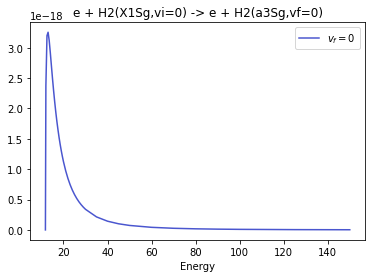

In [5]:
import matplotlib.pyplot as plt

df.plot('Energy', 'CS', color='#4a56cf', label="$v_f=0$")
plt.title("e + H2(X1Sg,vi=0) -> e + H2(a3Sg,vf=0)")
plt.savefig('a3Sg_vf_0.png')
plt.show()

## Solution exploration B

### 1. Read and display all the data 

It would be usefull to see all date plotted at once, per state, in an automatic way.

Let's create a dictionary, where we can store the data for each `state` and `vf`.

In [6]:
import collections
DATA = collections.defaultdict(dict)

#for state in ["a3Sg","B1Su"]:
#    for vf in range(0, 3):
#        url = DATA_URL.format(state=state, vf=vf)
#        DATA[state][vf] = pd.read_csv(url, comment='#', sep='\s+', header=None, names=["Energy", "CS"])

for cdid in METADATA.keys():
    DATA[METADATA[cdid]["state"]][METADATA[cdid]["vf"]] = pd.read_csv(DATA_URLPATTERN.format(cdid), comment='#', skiprows=2, sep='\s+', header=None, names=["Energy", "CS"])

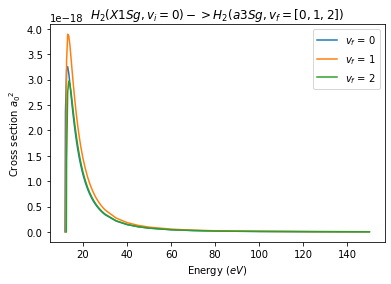

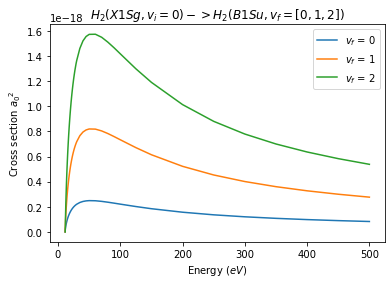

In [7]:
for state in DATA.keys():
    fig, ax = plt.subplots()
    for vf in DATA[state]:
        ax.plot(DATA[state][vf]["Energy"], DATA[state][vf]["CS"], label="$v_f$ = {}".format(vf))    
    ax.set_title("$H_2(X1Sg, v_i=0) -> H_2({state}, v_f=[0,1,2])$".format(state=state))
    ax.set_xlabel("Energy ($eV$)")
    ax.set_ylabel("Cross section ${a_0}^2$")
    ax.legend()
    plt.show()